In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-carplates/License_plate_Egypt_private.jpg
/kaggle/input/test-carplates/car_plate_test.png
/kaggle/input/test-carplates/640px-Egyptian_license_plate_for_trucks.jpg
/kaggle/input/test-carplates/2000s_Egyptian_license_plate.jpg
/kaggle/input/test-carplates/images.jpg
/kaggle/input/test-images/car_plate_test.png


In [33]:
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow

In [34]:
!pip install ultralytics

In [35]:
from ultralytics import YOLO
from IPython.display import display, Image

In [37]:
!pip install supervision

In [41]:
!pip install "numpy<2" --upgrade
!pip install --upgrade ultralytics matplotlib opencv-python supervision


  Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.26.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
ydata-profiling 4.18.0 requires matplotlib<=3.10,>=3.5, but you have matplotlib 3.10.8 which is incompatible.
google-colab 1.0.0 requires jupyter-server==2.14.0, but you have jupyter-server 2.12.5 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymna

In [11]:
import numpy as np
print(np.__version__)  # should show 1.x, e.g., 1.26.x


2.0.2


# Roboflow Arabic License Plate Dataset

In [36]:
!pip install roboflow

In [38]:
from roboflow import Roboflow
rf = Roboflow(api_key="EL2Z29J4BkOtL9xBSdND")
project = rf.workspace("alpr-system").project("arabic-plates")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [39]:
!yolo settings datasets_dir='/kaggle/working/arabic-plates-1'

✅ Updated 'datasets_dir=/kaggle/working/arabic-plates-1'
JSONDict("/root/.config/Ultralytics/settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "/kaggle/working/arabic-plates-1",
  "weights_dir": "weights",
  "runs_dir": "runs",
  "uuid": "1bfc3e992d24318da58ddee183be5bf9388a31f26bab1738e986ec4d297417ff",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": false,
  "wandb": false,
  "vscode_msg": true,
  "openvino_msg": true
}
💡 Learn more about Ultralytics Settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings


In [65]:
!yolo task=detect mode=train model=yolov8n.pt data='/kaggle/working/arabic-plates-1/data.yaml' epochs=100 imgsz=640

Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/arabic-plates-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

In [66]:
model=YOLO('/kaggle/working/runs/detect/train4/weights/best.pt')

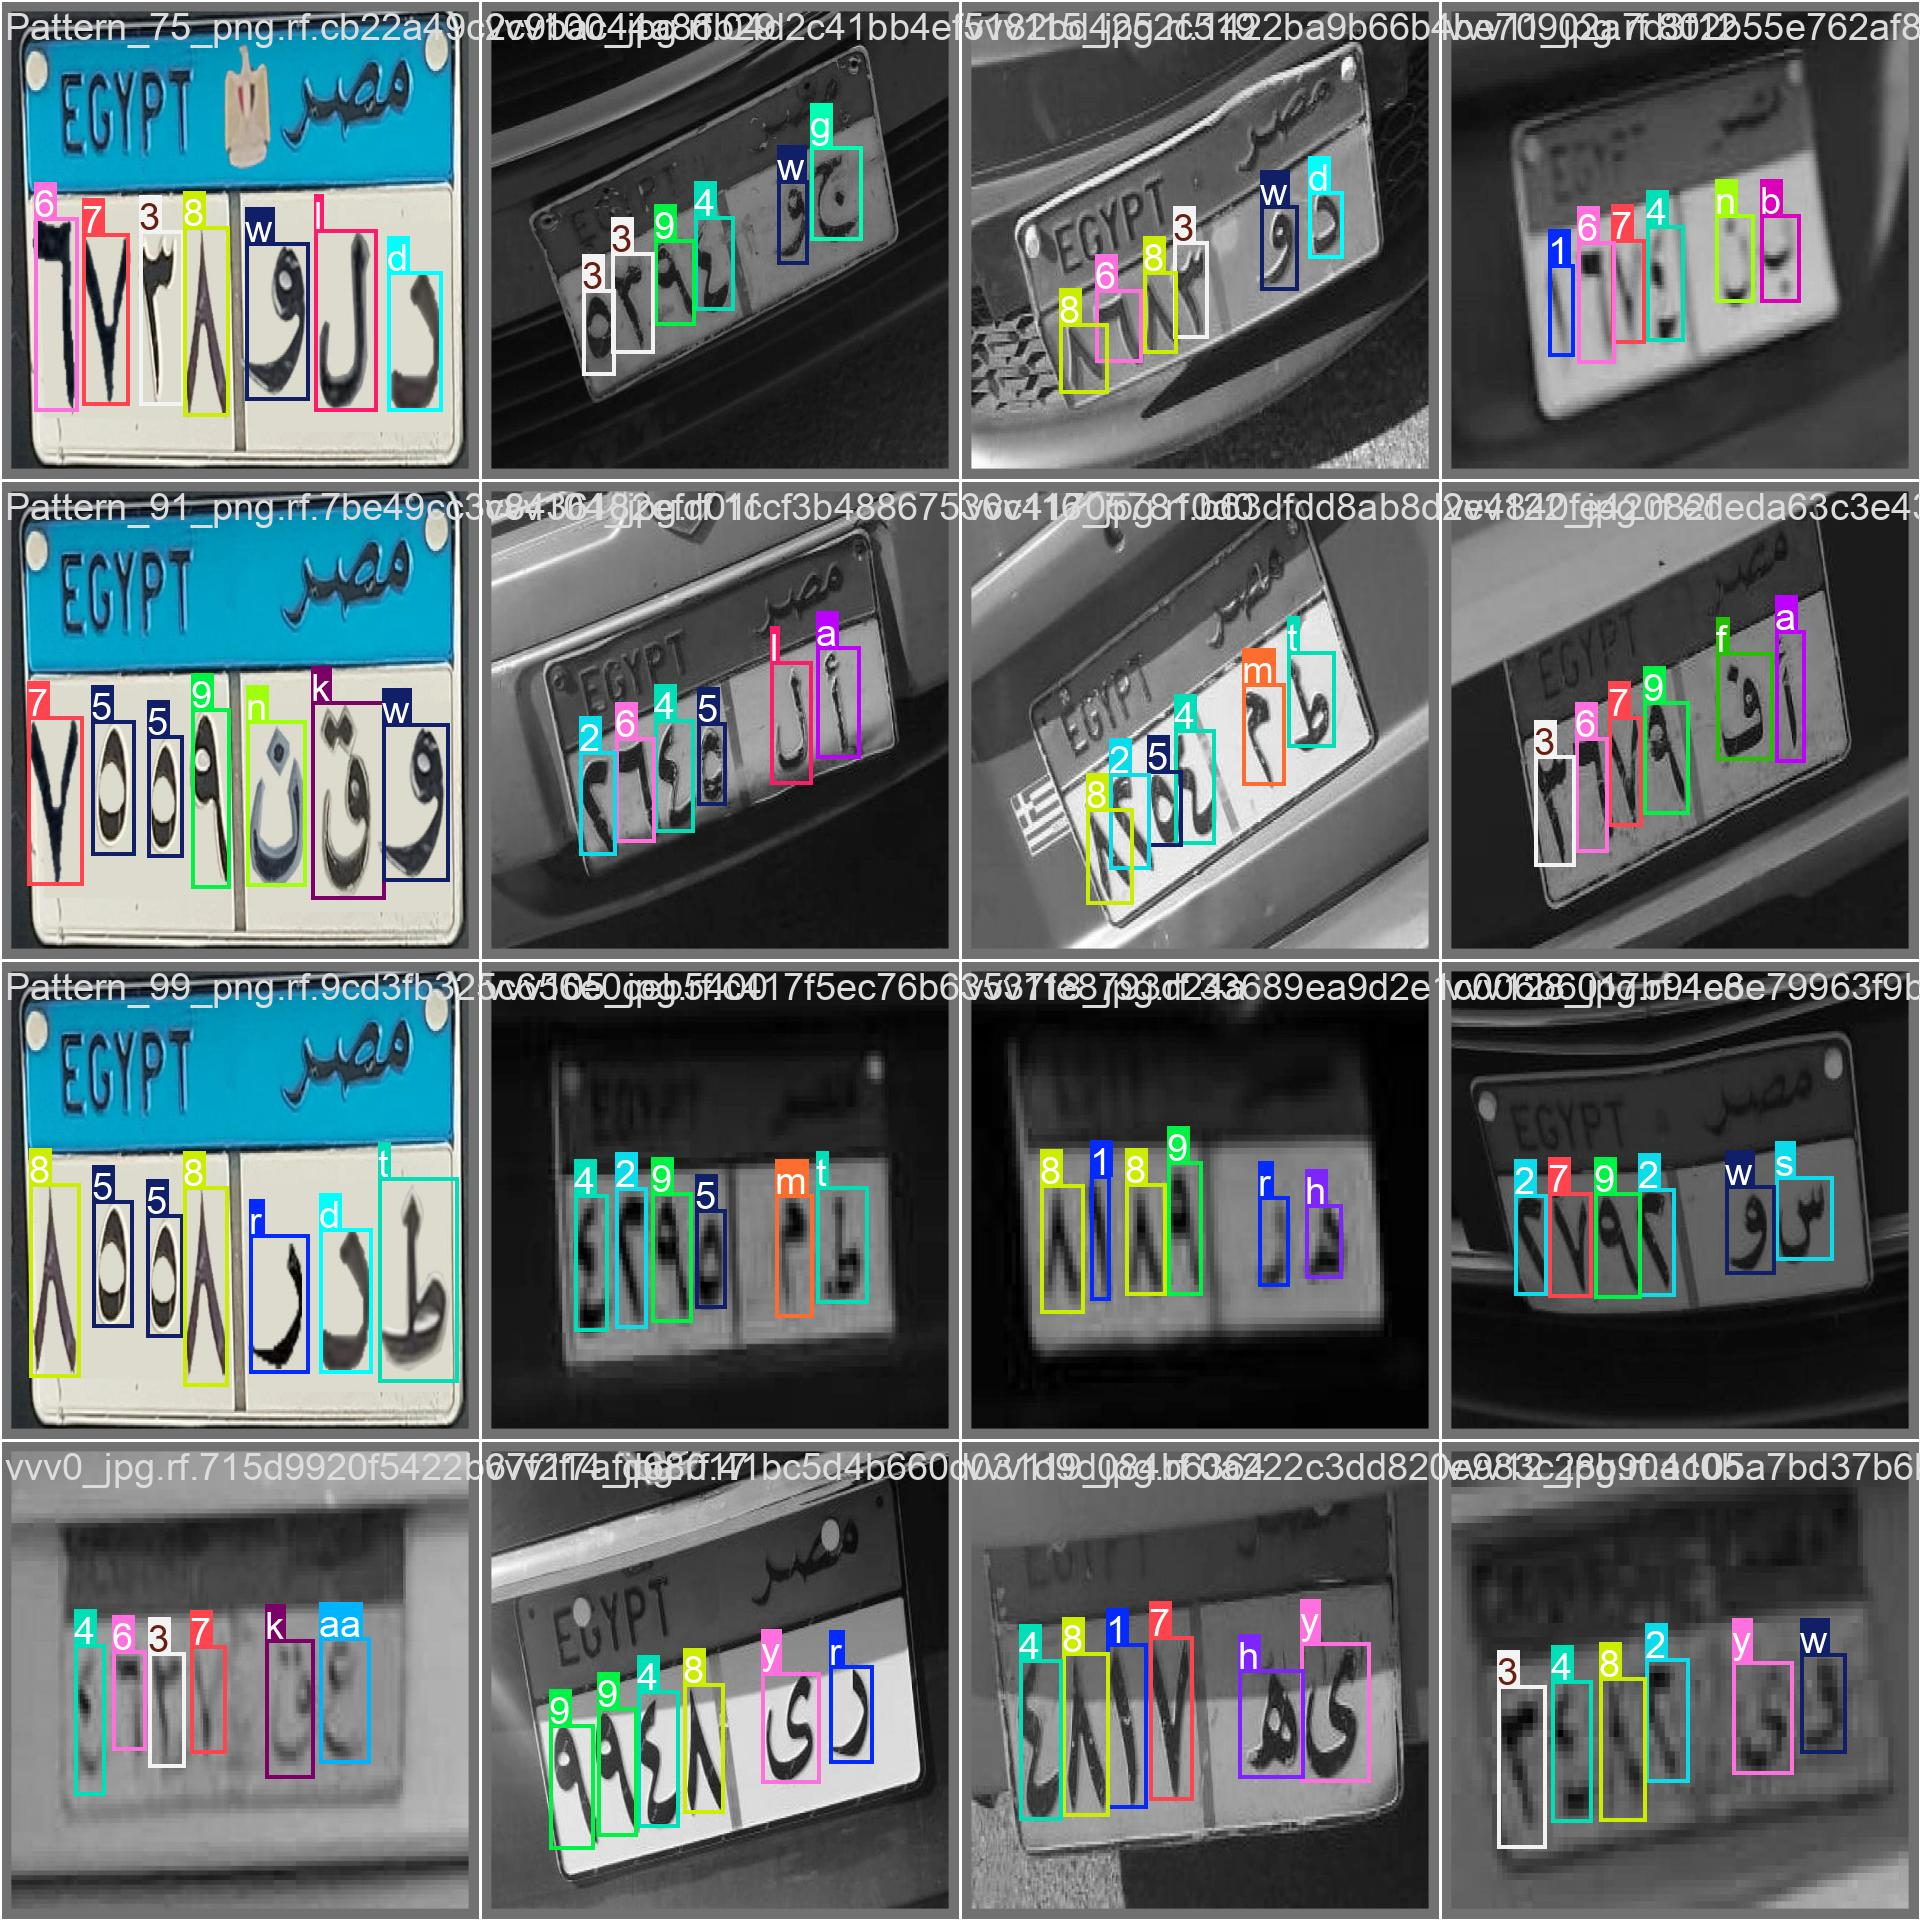

In [67]:
Image(filename='/kaggle/working/runs/detect/train4/val_batch2_labels.jpg',height = 500)

# Prediction on custom data

In [70]:
result=model.predict('/kaggle/input/test-carplates/License_plate_Egypt_private.jpg',save=True)


image 1/1 /kaggle/input/test-carplates/License_plate_Egypt_private.jpg: 352x640 1 3, 1 5, 1 9, 2 bs, 1 t, 39.9ms
Speed: 2.0ms preprocess, 39.9ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)
Results saved to /kaggle/working/runs/detect/predict5


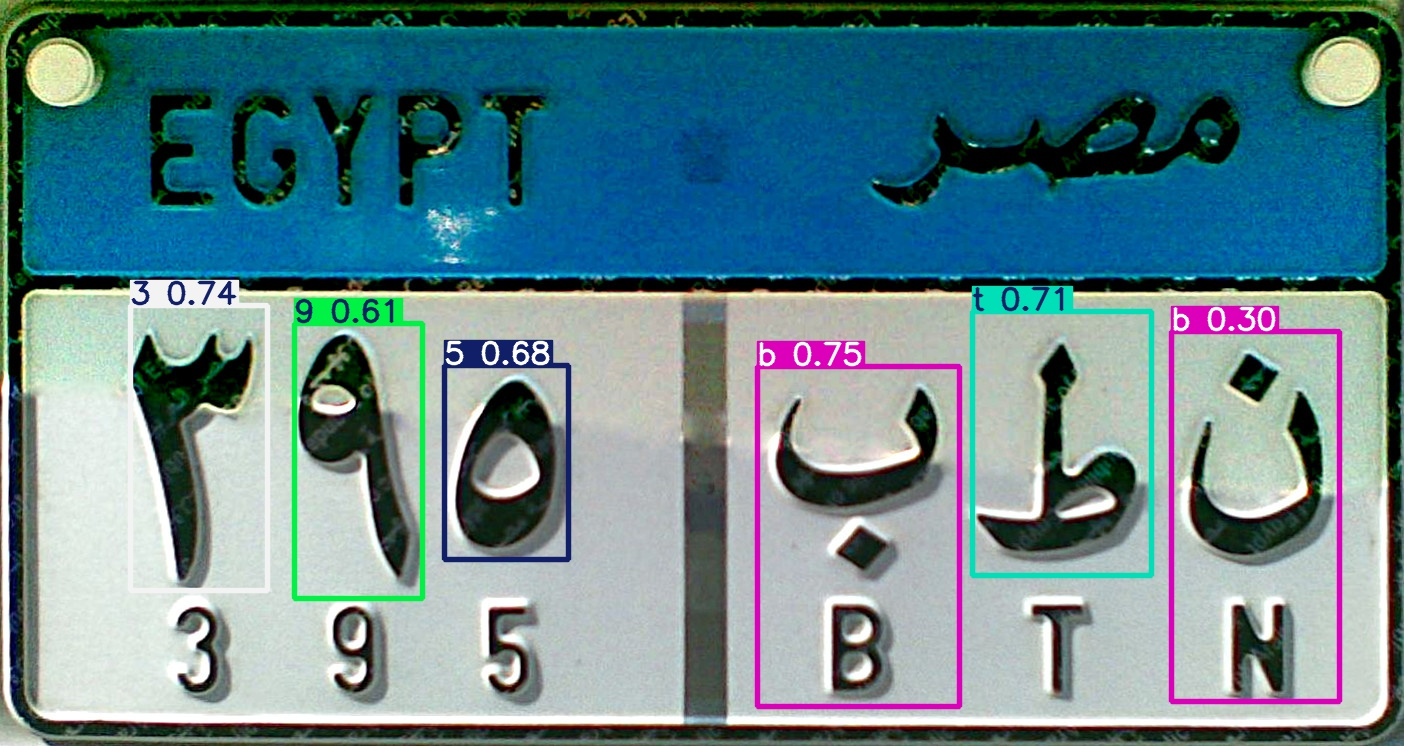

In [71]:
Image(filename='/kaggle/working/runs/detect/predict5/License_plate_Egypt_private.jpg',height = 500)